## CODSOFT INTERNSHIP TASK-2

### IMDB Movies India-Prediction
#### By:- SUBHASMITH PRADHAN

#### Import Libraries

In [89]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report


### Displaying Top rated Indian Movie list

In [24]:
Image(url="https://www.smartprix.com/bytes/wp-content/uploads/2022/10/4146A764-B8FE-4E5D-A7C4-1AD13A9AF299-1024x768-photoutils.com_.jpeg", height=600,width=900)

#### Import Dataset

In [25]:
Dataset=pd.read_csv(r'C:\Users\WELCOME\Downloads\IMDb Movies India.csv.csv')
Dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


#### Inspect the Dataframe

In [26]:
Dataset.shape

(15509, 10)

#### Export Dataset

In [27]:
Dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


#### Collecting some Information From Dataset

In [28]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [29]:
Dataset.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


## Data Cleaning

### Checking for Null/Missing Values

In [30]:
Dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
Dataset.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [32]:
## displaying all missing or Null value from every column
Dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [33]:
#### Shorting the values in ascending order
Dataset.isnull().sum().sort_values()

Name           0
Director     525
Year         528
Actor 1     1617
Genre       1877
Actor 2     2384
Actor 3     3144
Votes       7589
Rating      7590
Duration    8269
dtype: int64

In [34]:
#### Shorting the values in descending order
Dataset.isnull().sum().sort_values(ascending=False)

Duration    8269
Rating      7590
Votes       7589
Actor 3     3144
Actor 2     2384
Genre       1877
Actor 1     1617
Year         528
Director     525
Name           0
dtype: int64

In [35]:
Dataset.isnull().sum(axis=0).sort_values(ascending=False)

Duration    8269
Rating      7590
Votes       7589
Actor 3     3144
Actor 2     2384
Genre       1877
Actor 1     1617
Year         528
Director     525
Name           0
dtype: int64

In [36]:
#### Row-wise null-count
Dataset.isnull().sum(axis=1).sort_values(ascending=False)


1920     9
1836     9
3807     9
8669     9
9600     9
        ..
7385     0
7383     0
7380     0
7377     0
15508    0
Length: 15509, dtype: int64

In [37]:
#### Column-wise null-count %
Dataset.isnull().sum(axis=0).sort_values(ascending=False)/len(Dataset)

Duration    0.533174
Rating      0.489393
Votes       0.489329
Actor 3     0.202721
Actor 2     0.153717
Genre       0.121027
Actor 1     0.104262
Year        0.034045
Director    0.033851
Name        0.000000
dtype: float64

In [38]:
#### %le value
Dataset.isnull().sum(axis=0).sort_values(ascending=False)/len(Dataset)*100

Duration    53.317429
Rating      48.939326
Votes       48.932878
Actor 3     20.272100
Actor 2     15.371720
Genre       12.102650
Actor 1     10.426204
Year         3.404475
Director     3.385131
Name         0.000000
dtype: float64

#### Name of the Columns

In [39]:
Dataset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

#### Drop the Unecessary Column

In [42]:
Dataset=Dataset.drop(['Year', 'Duration','Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],axis=1)

In [43]:
Dataset

,Name,Genre,Rating
0,,Drama,NaN
1,#Gadhvi (He thought he was Gandhi),Drama,7.0
2,#Homecoming,"Drama, Musical",NaN
3,#Yaaram,"Comedy, Romance",4.4
4,...And Once Again,Drama,NaN
...,...,...,...
15504,Zulm Ko Jala Doonga,Action,4.6
15505,Zulmi,"Action, Drama",4.5
15506,Zulmi Raj,Action,NaN
15507,Zulmi Shikari,Action,NaN


#### Drop the Unecessary rows using columns with high Null percentage

In [44]:
Dataset.isnull().sum().sort_values(ascending=False)/len(Dataset)

Rating    0.489393
Genre     0.121027
Name      0.000000
dtype: float64

In [45]:
#### making it into a round value
round(Dataset.isnull().sum().sort_values(ascending=False)/len(Dataset)*100,2)

Rating    48.94
Genre     12.10
Name       0.00
dtype: float64

In [46]:
Dataset

,Name,Genre,Rating
0,,Drama,NaN
1,#Gadhvi (He thought he was Gandhi),Drama,7.0
2,#Homecoming,"Drama, Musical",NaN
3,#Yaaram,"Comedy, Romance",4.4
4,...And Once Again,Drama,NaN
...,...,...,...
15504,Zulm Ko Jala Doonga,Action,4.6
15505,Zulmi,"Action, Drama",4.5
15506,Zulmi Raj,Action,NaN
15507,Zulmi Shikari,Action,NaN


In [47]:
Dataset['Name'].notnull()

0        True
1        True
2        True
3        True
4        True
         ... 
15504    True
15505    True
15506    True
15507    True
15508    True
Name: Name, Length: 15509, dtype: bool

In [48]:
Dataset['Genre'].notnull()

0        True
1        True
2        True
3        True
4        True
         ... 
15504    True
15505    True
15506    True
15507    True
15508    True
Name: Genre, Length: 15509, dtype: bool

In [49]:
Dataset['Rating'].notnull()

0        False
1         True
2        False
3         True
4        False
         ...  
15504     True
15505     True
15506    False
15507    False
15508     True
Name: Rating, Length: 15509, dtype: bool

In [51]:
#### separating only TRUE vale for 'Rating'
Dataset[Dataset['Rating'].notnull()]

,Name,Genre,Rating
1,#Gadhvi (He thought he was Gandhi),Drama,7.0
3,#Yaaram,"Comedy, Romance",4.4
5,...Aur Pyaar Ho Gaya,"Comedy, Drama, Musical",4.7
6,...Yahaan,"Drama, Romance, War",7.4
8,?: A Question Mark,"Horror, Mystery, Thriller",5.6
...,...,...,...
15501,Zulm Ki Hukumat,"Action, Crime, Drama",5.3
15503,Zulm Ki Zanjeer,"Action, Crime, Drama",5.8
15504,Zulm Ko Jala Doonga,Action,4.6
15505,Zulmi,"Action, Drama",4.5


In [52]:
#### separating only TRUE vale for 'Rating' & 'Genre'
Dataset=Dataset[Dataset['Rating'].notnull()]
Dataset=Dataset[Dataset['Genre'].notnull()]

In [53]:
#### making it into a round value
round(Dataset.isnull().sum().sort_values(ascending=False)/len(Dataset)*100,2)

Name      0.0
Genre     0.0
Rating    0.0
dtype: float64

In [58]:
(Dataset.isnull().sum(axis=1).sort_values(ascending=False) >5).sum()

0

#### Label Encoding

In [61]:
lb=LabelEncoder()

In [62]:
Dataset['Name']=lb.fit_transform(Dataset['Name'])

In [69]:
Dataset['Genre']=lb.fit_transform(Dataset['Genre'])

### Creating Corelation Map

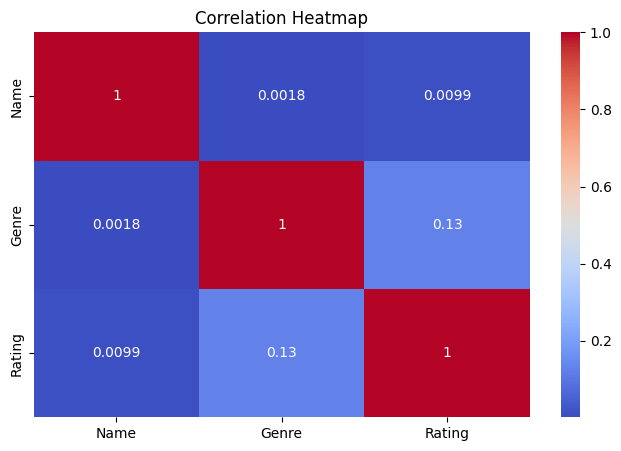

In [70]:
correlation_matrix=Dataset.corr()
plt.figure(figsize=(8,5))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Splitting Data

In [71]:
#### Predicting the rating
x=Dataset.drop('Rating', axis=1)
y=Dataset['Rating']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)
display(x_train.shape, y_train.shape,x_test.shape,y_test.shape)

(5471, 2)

(5471,)

(2346, 2)

(2346,)

#### Applying Model

## Linear Regression

In [83]:
LnR=LinearRegression()

In [84]:
LnR.fit(x_train, y_train)

LinearRegression()

In [85]:
x_train

,Name,Genre
6126,2951,28
2796,1328,27
6826,3271,330
5978,2876,281
11616,5471,42
...,...,...
6671,3194,330
2607,1233,28
9066,4295,268
14514,6798,408


In [86]:
y_train

6126     3.0
2796     5.3
6826     2.1
5978     7.2
11616    6.6
        ... 
6671     7.1
2607     5.0
9066     4.8
14514    6.4
2494     4.5
Name: Rating, Length: 5471, dtype: float64

#### Making a prediction on the test set

In [93]:
y_predLnR = LnR.predict(x_test)

In [88]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2346 entries, 5650 to 1351
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Name    2346 non-null   int32
 1   Genre   2346 non-null   int64
dtypes: int32(1), int64(1)
memory usage: 45.8 KB


## Thank You